<a href="https://colab.research.google.com/github/GiaHan2702/lab1_intro_python/blob/main/ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3/ a) function to add Salts and Peppers noise to the given image

filter: salt and peppers


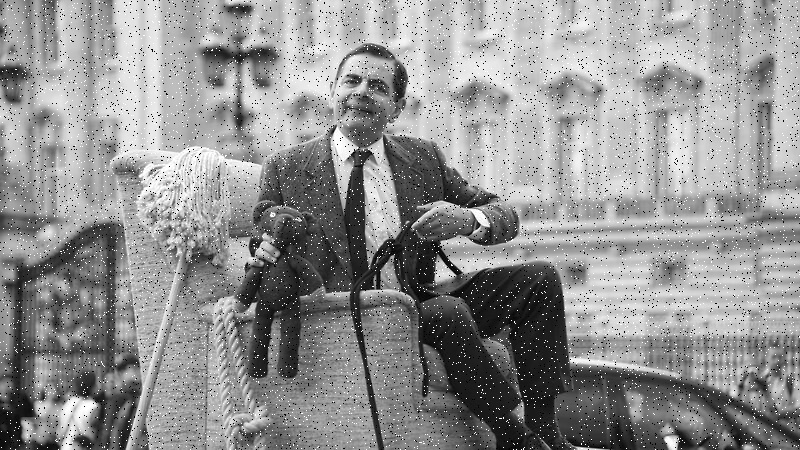

In [16]:
import numpy as np
from google.colab.patches import cv_imshow
from google.colab import drive
import random
import cv2
#load image
#To read the image, we use the “imread” method from the cv2 package, where the first parameter is the image’s path, including filename and extension,
# and the second parameter is a flag that determines how to read in the image

#image_path='/content/drive/MyDrive/Colab Notebooks/mrbean.jpg'
#image=cv.imread(image_path,0)

  # Note the random values generated must be within the range of the image dimensions.
  # The x and y coordinates must be within the range of the image size
  # each pixel is black 0, white is 1 for binary
  #each pixel is a shade of grey, from 0 (black) to 255 (white)

def add_noise(img):

	# Getting the dimensions of the image
	row , col = img.shape
	
	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(300, 10000)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to white
		img[y_coord][x_coord] = 255
		
	# Randomly pick some pixels in
	# the image for coloring them black
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(300 , 10000)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to black
		img[y_coord][x_coord] = 0
		
	return img

# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/mrbean.jpg',
				cv2.IMREAD_GRAYSCALE)

#Storing the image
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/mrbean.jpg',
			add_noise(img))
print("filter: salt and peppers")
cv_imshow(img)


b) Write your own function to apply the median filter with kernel size 3 × 3
and apply to the image with noise in part a. (Note that in case you develop 
a more-options function ( i.e. can input any kernel size), there will be 
bonus points).

In [27]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    index = len(window) // 2
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = sorted(
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data

before:


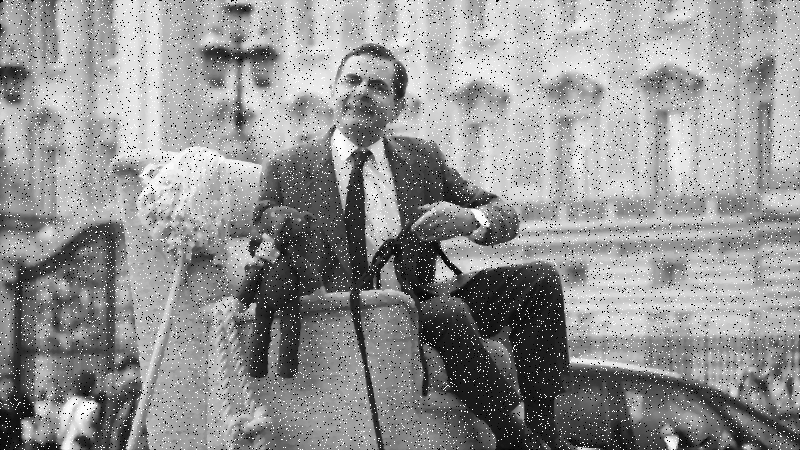

after:


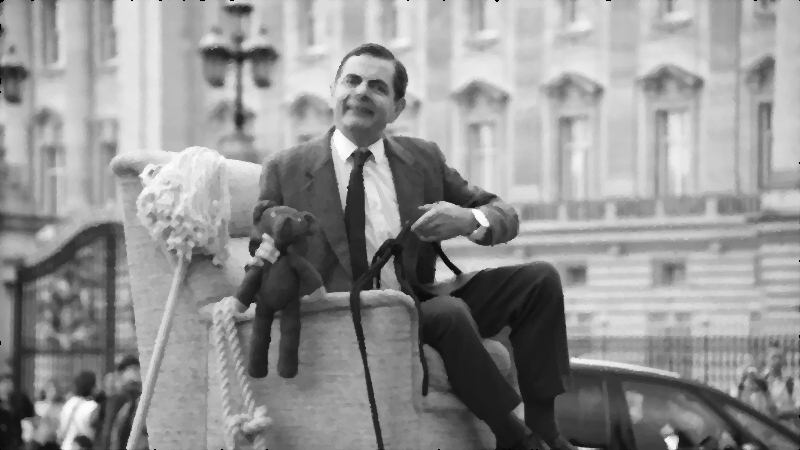

In [30]:

#Storing the image
print("before:")
noisy_img= add_noise(img)
cv_imshow(noisy_img)
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/mrbean.jpg',median_filter(noisy_img,3))
print("after:")
cv_imshow(noisy_img)